# **Step 01: Import Libraries**

In [373]:
''' 
    /*----------------------------- IMPORT_LIBRARIES -------------
'''
import re          #regix
import string
import pickle
import numpy as np                     # For preprocessing
import array
import pandas as pd    #data menupulation
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [374]:
# data = pd.read_excel('sample-data.xlsx')
# data = pd.DataFrame(data)
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print("Complete DataSet:")
# print("=============\n")
# #Load the Training Data
# data.head()

# Load SRS-Training and Testing CSV data (that was saved in experiment 01)

## Load training dataset

In [375]:
training_data = pd.read_excel('sample-data.xlsx')
training_data = pd.DataFrame(training_data)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Complete DataSet:")
print("=============\n")
#Load the Training Data
training_data.head()    #top rows default

Complete DataSet:



,st,yr,type,mtype,lat,long,rain,rel_hum,cloud,avg_sun,temp,ndvi,hectares,prod
0,Barisal,2011,Aus,1,22.70,90.3600,159.083333,82.583333,3.541667,6.133333,27.662500,0.463067,34995.0,60.966
1,Bhola,2011,Aus,1,22.70,90.6600,167.916667,83.583333,3.208333,5.741667,27.425000,0.374838,64819.0,109.977
2,Bogra,2011,Aus,1,24.88,89.3600,143.416667,77.916667,3.325000,5.858333,27.641667,0.458843,25622.0,53.248
3,Chandpur,2011,Aus,1,23.26,90.6700,177.333333,80.083333,4.066667,5.425000,27.716667,0.480152,9930.0,24.282
4,Chittagong,2011,Aus,1,22.35,91.8166,260.666667,79.000000,3.558333,6.411131,27.995833,0.573087,45191.0,108.080


In [376]:
training_data.columns

Index(['st', 'yr', 'type', 'mtype', 'lat', 'long', 'rain', 'rel_hum', 'cloud',
       'avg_sun', 'temp', 'ndvi', 'hectares', 'prod'],
      dtype='object')

In [377]:
training_data.shape

(600, 14)

In [378]:
training_data.drop(['st', 'yr', 'type', 'mtype', 'lat', 'long', 'rain','avg_sun',], axis=1, inplace=True)

In [379]:
data = training_data

In [380]:
input_training_features = data
input_training_features = input_training_features.iloc[:,:6]


In [381]:
input_training_features.columns

Index(['rel_hum', 'cloud', 'temp', 'ndvi', 'hectares', 'prod'], dtype='object')

In [382]:
input_training_features.head()

,rel_hum,cloud,temp,ndvi,hectares,prod
0,82.583333,3.541667,27.662500,0.463067,34995.0,60.966
1,83.583333,3.208333,27.425000,0.374838,64819.0,109.977
2,77.916667,3.325000,27.641667,0.458843,25622.0,53.248
3,80.083333,4.066667,27.716667,0.480152,9930.0,24.282
4,79.000000,3.558333,27.995833,0.573087,45191.0,108.080


In [383]:
input_training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rel_hum   600 non-null    float64
 1   cloud     600 non-null    float64
 2   temp      600 non-null    float64
 3   ndvi      600 non-null    float64
 4   hectares  600 non-null    float64
 5   prod      600 non-null    float64
dtypes: float64(6)
memory usage: 28.2 KB


In [384]:
input_training_features.describe()

,rel_hum,cloud,temp,ndvi,hectares,prod
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,78.472042,3.497701,27.812951,0.504375,78355.926717,225.610970
std,2.282526,0.292242,0.411310,0.050556,75668.470010,213.819454
min,70.750000,2.800000,26.620833,0.363200,0.000000,0.000000
25%,76.966314,3.315316,27.560417,0.474057,27435.750000,65.654250
50%,78.479877,3.499339,27.870305,0.513014,60434.000000,180.079850
75%,79.916667,3.668335,28.121526,0.537620,120573.500000,297.827500
max,84.583333,4.641667,28.554266,0.610363,812571.000000,1107.015000


In [385]:
input_training_features.aggregate(["min", "max", "median", "skew"])  

,rel_hum,cloud,temp,ndvi,hectares,prod
min,70.750000,2.800000,26.620833,0.363200,0.000000,0.000000
max,84.583333,4.641667,28.554266,0.610363,812571.000000,1107.015000
median,78.479877,3.499339,27.870305,0.513014,60434.000000,180.079850
skew,-0.226214,0.488560,-0.698659,-0.569607,2.968821,1.469131


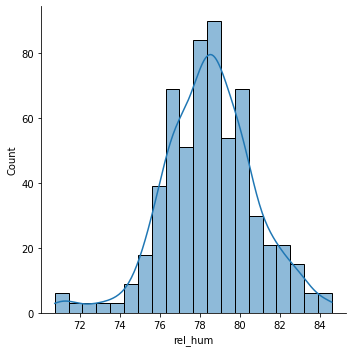

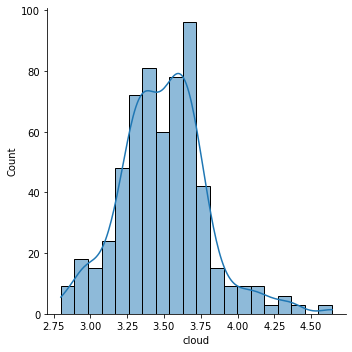

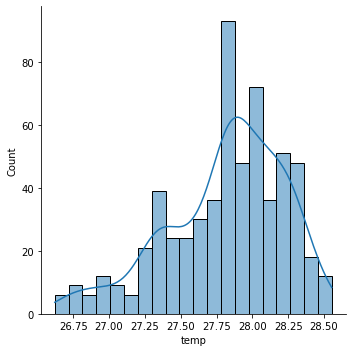

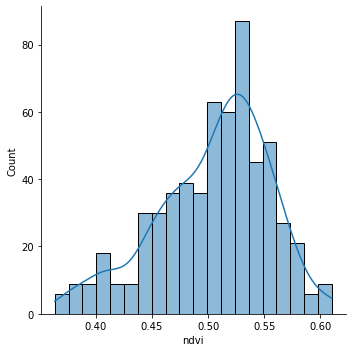

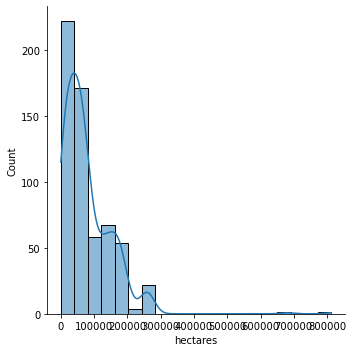

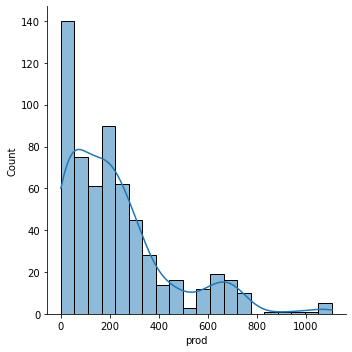

In [386]:
Numerical_column_list=['rel_hum', 'cloud', 'temp', 'ndvi', 'hectares', 'prod']
for indx,col in enumerate(Numerical_column_list):  # enumerate iterate through a sequence and keeps track of both the index and the element.
    sns.displot(x=col,data=input_training_features,bins=20,kde= True)  # here element is stored in col and index is stored in idx
    plt.show()
    print("\n\n")

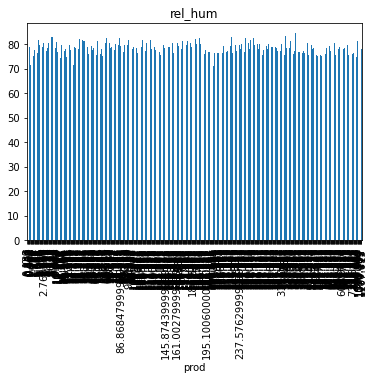

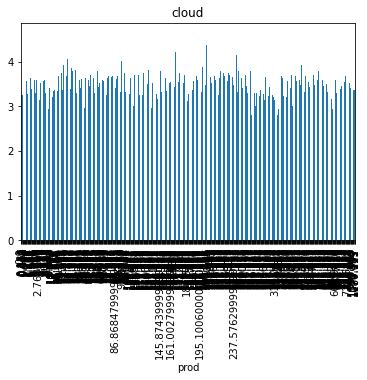

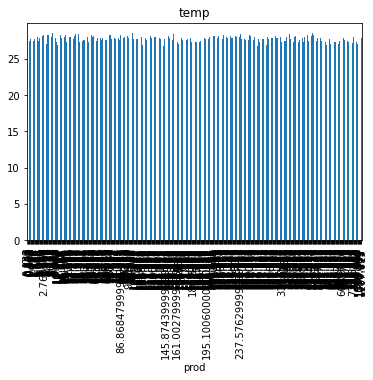

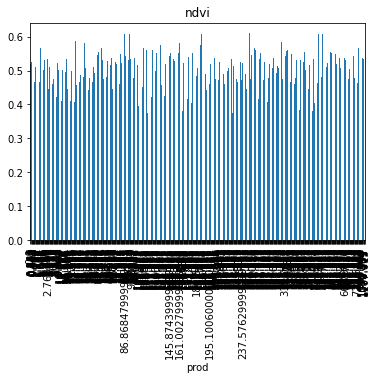

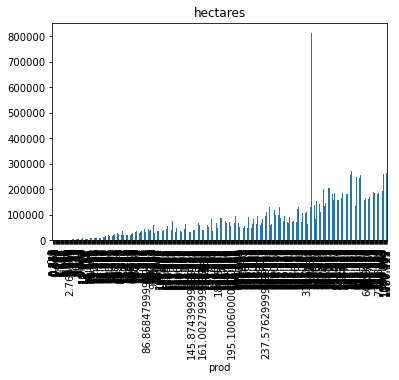

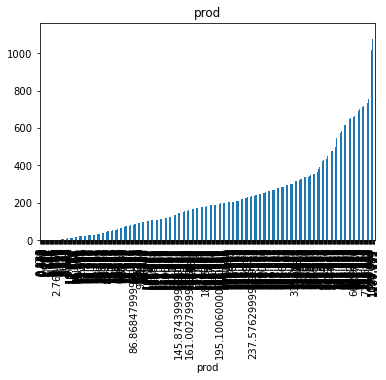

In [387]:
for indx,num in enumerate(Numerical_column_list):   # enumerate iterate through a sequence and keeps track of both the index and the element.
    plt.subplot(111)                               # here element is stored in num and index is stored in idx
    a = input_training_features.groupby('prod')[num].median()
#     print(a)
    a.plot.bar(title = num)
    plt.show()

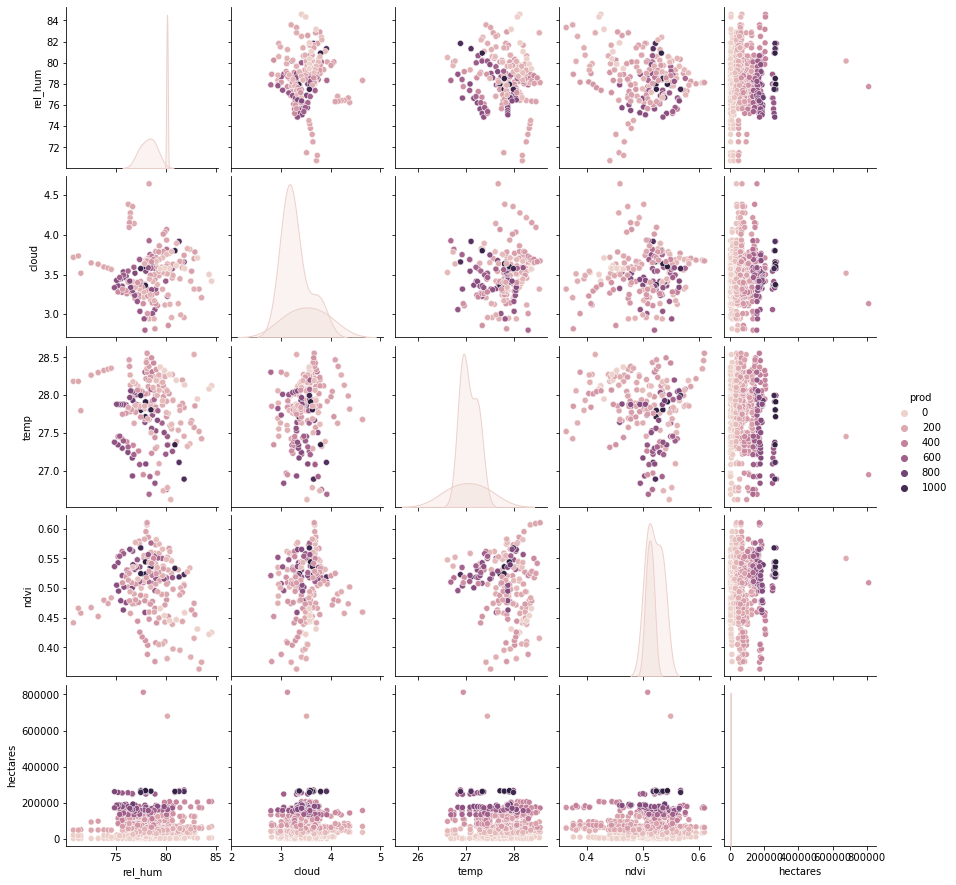

In [388]:
# pairplot with hue sex
sns.pairplot(input_training_features, hue ='prod')
# to show
plt.show()
  

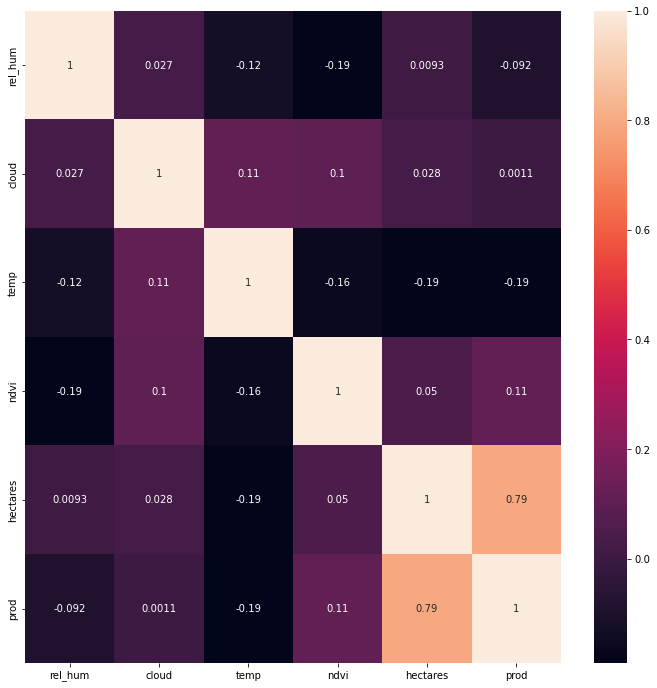

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (12,12) )
corrMatrix = input_training_features.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [390]:
input_training_features=input_training_features[input_training_features['hectares']<600000]

In [391]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
result = list(kf.split(input_training_features))


In [392]:
result[7][0]

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  42,  45,
        46,  47,  48,  49,  50,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 116,
       117, 118, 119, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131,
       132, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 173, 174, 175,
       176, 177, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 20

In [393]:
train1 = result[0][0]
test1 = result[0][1]

train2 = result[1][0]
test2 = result[1][1]

train3 = result[2][0]
test3 = result[2][1]

train4 = result[3][0]
test4 = result[3][1]

train5 = result[4][0]
test5 = result[4][1]

train6 = result[5][0]
test6 = result[5][1]

train7 = result[6][0]
test7 = result[6][1]

train8 = result[7][0]
test8 = result[7][1]

train9 = result[8][0]
test9 = result[8][1]

train10 = result[9][0]
test10 = result[9][1]

In [394]:
train_data1 = input_training_features.iloc[train1]
test_data1 = input_training_features.iloc[test1]


train_data2 = input_training_features.iloc[train2]
test_data2 = input_training_features.iloc[test2]

train_data3 = input_training_features.iloc[train3]
test_data3 = input_training_features.iloc[test3]

train_data4 = input_training_features.iloc[train4]
test_data4 = input_training_features.iloc[test4]

train_data5 = input_training_features.iloc[train5]
test_data5 = input_training_features.iloc[test5]

train_data6 = input_training_features.iloc[train6]
test_data6 = input_training_features.iloc[test6]

train_data7 = input_training_features.iloc[train7]
test_data7 = input_training_features.iloc[test7]

train_data8 = input_training_features.iloc[train8]
test_data8 = input_training_features.iloc[test8]

train_data9 = input_training_features.iloc[train9]
test_data9 = input_training_features.iloc[test9]

train_data10 = input_training_features.iloc[train10]
test_data10 = input_training_features.iloc[test10]



In [395]:
test_data10 

,rel_hum,cloud,temp,ndvi,hectares,prod
1,83.583333,3.208333,27.425000,0.374838,64819.00,109.977000
13,81.833333,2.958333,27.458333,0.506354,1919.00,1.784000
20,80.250000,2.858333,27.345833,0.452037,43585.00,106.330000
21,80.083333,3.816667,26.754167,0.517391,506.00,1.004000
34,78.000000,2.950000,27.895833,0.486489,8151.00,9.068000
59,78.500000,3.175000,27.858333,0.501875,7593.00,9.273000
72,79.000000,3.133333,27.841667,0.407483,8447.00,22.977000
81,79.627312,3.569254,27.632223,0.550284,68779.00,172.305000
88,80.236618,3.241902,27.762642,0.530624,1520.00,2.031000
92,79.757607,3.789491,28.123802,0.532721,53722.00,93.409000


# For FOLD One

In [396]:
train_data2.iloc[:,:6]

,rel_hum,cloud,temp,ndvi,hectares,prod
0,82.583333,3.541667,27.662500,0.463067,34995.00,60.966000
1,83.583333,3.208333,27.425000,0.374838,64819.00,109.977000
2,77.916667,3.325000,27.641667,0.458843,25622.00,53.248000
3,80.083333,4.066667,27.716667,0.480152,9930.00,24.282000
4,79.000000,3.558333,27.995833,0.573087,45191.00,108.080000
5,80.583333,2.958333,27.554167,0.525052,14327.00,37.880000
7,71.500000,3.516667,27.795833,0.457757,628.00,0.927000
8,78.916667,3.058333,26.837500,0.495713,5739.00,15.678000
9,78.333333,2.941667,27.695833,0.474507,7618.00,5.273000
10,82.416667,3.816667,27.358333,0.533982,12310.00,29.897000


In [397]:
train_data1_input = train_data1.iloc[:,:5]
train_data1_output = train_data1.iloc[:,5:]
test_data1_input = test_data1.iloc[:,:5]
test_data1_output = test_data1.iloc[:,5:]

In [398]:
train_data1_input

,rel_hum,cloud,temp,ndvi,hectares
0,82.583333,3.541667,27.662500,0.463067,34995.00
1,83.583333,3.208333,27.425000,0.374838,64819.00
3,80.083333,4.066667,27.716667,0.480152,9930.00
4,79.000000,3.558333,27.995833,0.573087,45191.00
5,80.583333,2.958333,27.554167,0.525052,14327.00
6,80.000000,3.416667,27.220833,0.518553,69698.00
7,71.500000,3.516667,27.795833,0.457757,628.00
8,78.916667,3.058333,26.837500,0.495713,5739.00
9,78.333333,2.941667,27.695833,0.474507,7618.00
11,78.666667,3.008333,27.737500,0.507586,43338.00


In [399]:
train_data1_output

,prod
0,60.966000
1,109.977000
3,24.282000
4,108.080000
5,37.880000
6,157.418000
7,0.927000
8,15.678000
9,5.273000
11,106.649000


In [400]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [401]:
linear_regression = LinearRegression().fit(train_data1_input, train_data1_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data1_input, train_data1_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data1_input, train_data1_output)
print(gbr)
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)

print("\n\nTraining the Support Vector Regressor on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
svr_model = LinearSVR()
svr_model.fit(train_data1_input,train_data1_output)
print(svr_model)



ls_model = Lasso(random_state=0)
ls_model.fit(train_data1_input,train_data1_output)
print(ls_model)



sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data1_input,train_data1_output)
print(sgd_model)


GradientBoostingRegressor(learning_rate=0.001, max_depth=4, n_estimators=2000)


Training the Support Vector Regressor on Training Data


Parameters and their values:

LinearSVR()
Lasso(random_state=0)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])


In [402]:
dt_predict = linear_regression.predict(test_data1_input)
rf_predict = rf.predict(test_data1_input)
gdr_predict=gbr.predict(test_data1_input)
svrpredict=svr_model.predict(test_data1_input)
lspredict=ls_model.predict(test_data1_input)
sgdpredict=sgd_model.predict(test_data1_input)


# RMSE and R2 score

In [403]:
# Calculate the Root Mean Squared Error

''' 
/------------------------ CALCULATE_ROOT_MEAN_SQUARE_ERROR -----------------
|          Function: mean_squared_error()                              |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Root Mean Squared Error                               |
----------------------------------------------------------------------
'''

# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data1_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data1_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data1_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data1_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data1_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data1_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)

# print("linear_accuracy_rmse: {}".format(round(linear_accuracy_rmse,2)))
# print("baysian_accuracy_rmse: {}".format(round(baysian_accuracy_rmse,2)))
# print("SGDR: {}".format(round(sgd_model_rmse,2)))
# print("RF: {}".format(round(rf_model_rmse,2)))



Root Mean Squared Errors of Models:

RMSE-Linear :  70.39623147783303
RMSE-Random Forest:  61.69822338737834
RMSE-gradientboosterregression:  81.95188379428608
RMSE-svr :  101.82975010753324
RMSE-ls :  70.994263063908
RMSE-sgd :  70.40434979955039


In [404]:
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data1_output, dt_predict)
baysian_accuracy = r2_score(test_data1_output, rf_predict)
gradientboosterregression = r2_score(test_data1_output, gdr_predict)
svrprediction=r2_score(test_data1_output, svrpredict)
lsprediction=r2_score(test_data1_output, lspredict)
sgdprediction=r2_score(test_data1_output, sgdpredict)



In [405]:
print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)



R2-Linear :  0.8676447509222135
R2-Random Forest:  0.8983312075009884
R2-gradientboosterregression:  0.8206256954595972
R2-svr :  0.723056163414086
R2-ls :  0.8653864246628636
R2-sgd :  0.8676142218888265


# For Second Fold

In [406]:
train_data2_input = train_data2.iloc[:,:5]
train_data2_output = train_data2.iloc[:,5:]
test_data2_input = test_data2.iloc[:,:5]
test_data2_output = test_data2.iloc[:,5:]

In [407]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [408]:
linear_regression = LinearRegression().fit(train_data2_input, train_data2_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data2_input, train_data2_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data2_input, train_data2_output)
print(gbr)
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)

print("\n\nTraining the Support Vector Regressor on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
svr_model = LinearSVR()
svr_model.fit(train_data2_input,train_data2_output)
print(svr_model)



ls_model = Lasso(random_state=0)
ls_model.fit(train_data2_input,train_data2_output)
print(ls_model)



sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data2_input,train_data2_output)
print(sgd_model)


GradientBoostingRegressor(learning_rate=0.001, max_depth=4, n_estimators=2000)


Training the Support Vector Regressor on Training Data


Parameters and their values:

LinearSVR()
Lasso(random_state=0)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])


In [409]:
dt_predict = linear_regression.predict(test_data2_input)
rf_predict = rf.predict(test_data2_input)
gdr_predict=gbr.predict(test_data2_input)
svrpredict=svr_model.predict(test_data2_input)
lspredict=ls_model.predict(test_data2_input)
sgdpredict=sgd_model.predict(test_data2_input)

In [410]:
# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data2_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data2_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data2_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data2_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data2_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data2_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)



Root Mean Squared Errors of Models:

RMSE-Linear :  79.71194084433105
RMSE-Random Forest:  57.41463532408875
RMSE-gradientboosterregression:  72.96954937353995
RMSE-svr :  87.57296310288915
RMSE-ls :  80.82723100675102
RMSE-sgd :  79.67511631336978


In [411]:
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data2_output, dt_predict)
baysian_accuracy = r2_score(test_data2_output, rf_predict)
gradientboosterregression = r2_score(test_data2_output, gdr_predict)
svrprediction=r2_score(test_data2_output, svrpredict)
lsprediction=r2_score(test_data2_output, lspredict)
sgdprediction=r2_score(test_data2_output, sgdpredict)

In [412]:
print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)

R2-Linear :  0.8191204411086732
R2-Random Forest:  0.9061600117981212
R2-gradientboosterregression:  0.8484255323434429
R2-svr :  0.7816853839642662
R2-ls :  0.8140234765603058
R2-sgd :  0.8192875243912995


# For Third Fold

In [413]:
train_data3_input = train_data3.iloc[:,:5]
train_data3_output = train_data3.iloc[:,5:]
test_data3_input = test_data3.iloc[:,:5]
test_data3_output = test_data3.iloc[:,5:]

In [414]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [415]:
linear_regression = LinearRegression().fit(train_data3_input, train_data3_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data3_input, train_data3_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data3_input, train_data3_output)
print(gbr)
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)

print("\n\nTraining the Support Vector Regressor on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
svr_model = LinearSVR()
svr_model.fit(train_data3_input,train_data3_output)
print(svr_model)



ls_model = Lasso(random_state=0)
ls_model.fit(train_data2_input,train_data2_output)
print(ls_model)



sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data2_input,train_data2_output)
print(sgd_model)


GradientBoostingRegressor(learning_rate=0.001, max_depth=4, n_estimators=2000)


Training the Support Vector Regressor on Training Data


Parameters and their values:

LinearSVR()
Lasso(random_state=0)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])


In [416]:
dt_predict = linear_regression.predict(test_data3_input)
rf_predict = rf.predict(test_data3_input)
gdr_predict=gbr.predict(test_data3_input)
svrpredict=svr_model.predict(test_data3_input)
lspredict=ls_model.predict(test_data3_input)
sgdpredict=sgd_model.predict(test_data3_input)

In [417]:
# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data3_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data3_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data3_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data3_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data3_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data3_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)



Root Mean Squared Errors of Models:

RMSE-Linear :  73.41827333793947
RMSE-Random Forest:  62.056121120610534
RMSE-gradientboosterregression:  73.99913880560858
RMSE-svr :  108.9774808226642
RMSE-ls :  75.35854290329844
RMSE-sgd :  73.38016017308153


In [418]:
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data3_output, dt_predict)
baysian_accuracy = r2_score(test_data3_output, rf_predict)
gradientboosterregression = r2_score(test_data3_output, gdr_predict)
svrprediction=r2_score(test_data3_output, svrpredict)
lsprediction=r2_score(test_data3_output, lspredict)
sgdprediction=r2_score(test_data3_output, sgdpredict)

In [419]:
print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)

R2-Linear :  0.866352053607844
R2-Random Forest:  0.90451762585964
R2-gradientboosterregression:  0.8642289152408844
R2-svr :  0.7055392014435957
R2-ls :  0.8591947195268528
R2-sgd :  0.8664907772209195


# For Fourth Fold

In [420]:
train_data4_input = train_data4.iloc[:,:5]
train_data4_output = train_data4.iloc[:,5:]
test_data4_input = test_data4.iloc[:,:5]
test_data4_output = test_data4.iloc[:,5:]

In [421]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [422]:
linear_regression = LinearRegression().fit(train_data4_input, train_data4_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data4_input, train_data4_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.01, min_samples_split=2, max_depth=5)
gbr = gbr.fit(train_data4_input, train_data4_output)
print(gbr)
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)




svr_model = LinearSVR()
svr_model.fit(train_data4_input,train_data4_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data4_input,train_data4_output)




sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data4_input,train_data4_output)



dt_predict = linear_regression.predict(test_data4_input)
rf_predict = rf.predict(test_data4_input)
gdr_predict=gbr.predict(test_data4_input)
svrpredict=svr_model.predict(test_data4_input)
lspredict=ls_model.predict(test_data4_input)
sgdpredict=sgd_model.predict(test_data4_input)

# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data4_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data4_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data4_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data4_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data4_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data4_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)

print("============================\n")
print("============================\n")

from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data4_output, dt_predict)
baysian_accuracy = r2_score(test_data4_output, rf_predict)
gradientboosterregression = r2_score(test_data4_output, gdr_predict)
svrprediction=r2_score(test_data4_output, svrpredict)
lsprediction=r2_score(test_data4_output, lspredict)
sgdprediction=r2_score(test_data4_output, sgdpredict)
print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)




GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=2000)


Root Mean Squared Errors of Models:

RMSE-Linear :  81.67837482757186
RMSE-Random Forest:  58.32084104029844
RMSE-gradientboosterregression:  72.04378144807923
RMSE-svr :  149.1103610108865
RMSE-ls :  83.21593637768244
RMSE-sgd :  81.63092747743819


R2-Linear :  0.8500828606883868
R2-Random Forest:  0.9235663380439308
R2-gradientboosterregression:  0.8833646731225412
R2-svr :  0.5003651145318797
R2-ls :  0.8443854792858976
R2-sgd :  0.8502569852342733


# For Fifth Fold

In [423]:
train_data5_input = train_data5.iloc[:,:5]
train_data5_output = train_data5.iloc[:,5:]
test_data5_input = test_data5.iloc[:,:5]
test_data5_output = test_data5.iloc[:,5:]

In [424]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [425]:
linear_regression = LinearRegression().fit(train_data5_input, train_data5_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data5_input, train_data5_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data5_input, train_data5_output)



from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)




svr_model = LinearSVR()
svr_model.fit(train_data5_input,train_data5_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data5_input,train_data5_output)




sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data5_input,train_data5_output)



dt_predict = linear_regression.predict(test_data5_input)
rf_predict = rf.predict(test_data5_input)
gdr_predict=gbr.predict(test_data5_input)
svrpredict=svr_model.predict(test_data5_input)
lspredict=ls_model.predict(test_data5_input)
sgdpredict=sgd_model.predict(test_data5_input)


# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data5_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data5_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data5_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data5_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data5_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data5_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)

print("============================\n")
print("============================\n")

from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data5_output, dt_predict)
baysian_accuracy = r2_score(test_data5_output, rf_predict)
gradientboosterregression = r2_score(test_data5_output, gdr_predict)
svrprediction=r2_score(test_data5_output, svrpredict)
lsprediction=r2_score(test_data5_output, lspredict)
sgdprediction=r2_score(test_data5_output, sgdpredict)



print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)



Root Mean Squared Errors of Models:

RMSE-Linear :  81.88119147163621
RMSE-Random Forest:  52.140662990288625
RMSE-gradientboosterregression:  70.5525769025816
RMSE-svr :  105.17627978198888
RMSE-ls :  82.63550664976056
RMSE-sgd :  81.89655458641778


R2-Linear :  0.8782109004838087
R2-Random Forest:  0.9506152100967249
R2-gradientboosterregression:  0.9095797145175022
R2-svr :  0.7990556855523674
R2-ls :  0.8759566459936041
R2-sgd :  0.8781651943720149


# For Sixth Fold

In [426]:
train_data6_input = train_data6.iloc[:,:5]
train_data6_output = train_data6.iloc[:,5:]
test_data6_input = test_data6.iloc[:,:5]
test_data6_output = test_data6.iloc[:,5:]

In [427]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [428]:
linear_regression = LinearRegression().fit(train_data6_input, train_data6_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data6_input, train_data6_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data6_input, train_data6_output)



from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)




svr_model = LinearSVR()
svr_model.fit(train_data6_input,train_data6_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data6_input,train_data6_output)




sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data6_input,train_data6_output)



dt_predict = linear_regression.predict(test_data6_input)
rf_predict = rf.predict(test_data6_input)
gdr_predict=gbr.predict(test_data6_input)
svrpredict=svr_model.predict(test_data6_input)
lspredict=ls_model.predict(test_data6_input)
sgdpredict=sgd_model.predict(test_data6_input)


# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data6_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data6_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data6_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data6_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data6_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data6_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)


print("============================\n")
print("============================\n")
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data6_output, dt_predict)
baysian_accuracy = r2_score(test_data6_output, rf_predict)
gradientboosterregression = r2_score(test_data6_output, gdr_predict)
svrprediction=r2_score(test_data6_output, svrpredict)
lsprediction=r2_score(test_data6_output, lspredict)
sgdprediction=r2_score(test_data6_output, sgdpredict)



print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)



Root Mean Squared Errors of Models:

RMSE-Linear :  87.8921729282507
RMSE-Random Forest:  53.39494711137611
RMSE-gradientboosterregression:  65.9968413588475
RMSE-svr :  144.33446708280263
RMSE-ls :  87.83020526976978
RMSE-sgd :  87.89718477962467


R2-Linear :  0.8538184086011631
R2-Random Forest:  0.9460498565473385
R2-gradientboosterregression:  0.9175788663930187
R2-svr :  0.6057856869204132
R2-ls :  0.8540244642101825
R2-sgd :  0.8538017367799106


# For Seventh Fold

In [429]:
train_data8_input = train_data8.iloc[:,:5]
train_data8_output = train_data8.iloc[:,5:]
test_data8_input = test_data8.iloc[:,:5]
test_data8_output = test_data8.iloc[:,5:]

In [430]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [431]:
linear_regression = LinearRegression().fit(train_data8_input, train_data8_output)
rf = RandomForestRegressor(n_estimators =2000).fit(train_data8_input, train_data8_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data8_input, train_data8_output)



from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)




svr_model = LinearSVR()
svr_model.fit(train_data8_input,train_data8_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data8_input,train_data8_output)




sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data8_input,train_data8_output)



dt_predict = linear_regression.predict(test_data8_input)
rf_predict = rf.predict(test_data8_input)
gdr_predict=gbr.predict(test_data8_input)
svrpredict=svr_model.predict(test_data8_input)
lspredict=ls_model.predict(test_data8_input)
sgdpredict=sgd_model.predict(test_data8_input)


# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data8_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data8_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data8_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data8_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data8_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data8_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)


print("============================\n")
print("============================\n")
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data8_output, dt_predict)
baysian_accuracy = r2_score(test_data8_output, rf_predict)
gradientboosterregression = r2_score(test_data8_output, gdr_predict)
svrprediction=r2_score(test_data8_output, svrpredict)
lsprediction=r2_score(test_data8_output, lspredict)
sgdprediction=r2_score(test_data8_output, sgdpredict)



print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)




Root Mean Squared Errors of Models:

RMSE-Linear :  74.02424111475959
RMSE-Random Forest:  79.47131174292574
RMSE-gradientboosterregression:  84.04892823255334
RMSE-svr :  73.16280468364674
RMSE-ls :  74.4633580448357
RMSE-sgd :  74.14202673403132


R2-Linear :  0.8557468902650663
R2-Random Forest:  0.8337360784567031
R2-gradientboosterregression:  0.8140305458587634
R2-svr :  0.8590847653510136
R2-ls :  0.8540303751831861
R2-sgd :  0.8552874607755352


# For Eigth Fold

In [432]:
train_data7_input = train_data7.iloc[:,:5]
train_data7_output = train_data7.iloc[:,5:]
test_data7_input = test_data7.iloc[:,:5]
test_data7_output = test_data7.iloc[:,5:]

In [433]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [434]:
inear_regression = LinearRegression().fit(train_data7_input, train_data7_output)
rf = RandomForestRegressor(n_estimators =2000).fit(train_data7_input, train_data7_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data7_input, train_data7_output)




from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)





svr_model = LinearSVR()
svr_model.fit(train_data7_input,train_data7_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data7_input,train_data7_output)



sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data7_input,train_data7_output)



dt_predict = linear_regression.predict(test_data7_input)
rf_predict = rf.predict(test_data7_input)
pickle.dump(rf, open('rf_trained_model.pkl', 'wb'))

gdr_predict=gbr.predict(test_data7_input)


svrpredict=svr_model.predict(test_data7_input)
lspredict=ls_model.predict(test_data7_input)
sgdpredict=sgd_model.predict(test_data7_input)

# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data7_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data7_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data7_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data7_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data7_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data7_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)


print("============================\n")
print("============================\n")
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data7_output, dt_predict)
baysian_accuracy = r2_score(test_data7_output, rf_predict)
gradientboosterregression = r2_score(test_data7_output, gdr_predict)
svrprediction=r2_score(test_data7_output, svrpredict)
lsprediction=r2_score(test_data7_output, lspredict)
sgdprediction=r2_score(test_data7_output, sgdpredict)



print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)



Root Mean Squared Errors of Models:

RMSE-Linear :  92.69489968833702
RMSE-Random Forest:  76.88057292707977
RMSE-gradientboosterregression:  83.07369306862473
RMSE-svr :  93.75072691040853
RMSE-ls :  94.6261924026484
RMSE-sgd :  93.39620566011727


R2-Linear :  0.8320114302770806
R2-Random Forest:  0.884441664651035
R2-gradientboosterregression:  0.8650741725654068
R2-svr :  0.8281627386888765
R2-ls :  0.8249384436317123
R2-sgd :  0.829459897172446


# For ninth Fold

In [435]:
train_data9_input = train_data9.iloc[:,:5]
train_data9_output = train_data9.iloc[:,5:]
test_data9_input = test_data9.iloc[:,:5]
test_data9_output = test_data9.iloc[:,5:]

In [436]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [437]:
inear_regression = LinearRegression().fit(train_data9_input, train_data9_output)
rf = RandomForestRegressor(n_estimators =2000).fit(train_data9_input, train_data9_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data9_input, train_data9_output)




from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)





svr_model = LinearSVR()
svr_model.fit(train_data9_input,train_data9_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data9_input,train_data9_output)



sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data9_input,train_data9_output)



dt_predict = linear_regression.predict(test_data9_input)
rf_predict = rf.predict(test_data9_input)
pickle.dump(rf, open('rf_trained_model.pkl', 'wb'))

gdr_predict=gbr.predict(test_data9_input)


svrpredict=svr_model.predict(test_data9_input)
lspredict=ls_model.predict(test_data9_input)
sgdpredict=sgd_model.predict(test_data9_input)


# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data9_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data9_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data9_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data9_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data9_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data9_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)

print("============================\n")
print("============================\n")
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data9_output, dt_predict)
baysian_accuracy = r2_score(test_data9_output, rf_predict)
gradientboosterregression = r2_score(test_data9_output, gdr_predict)
svrprediction=r2_score(test_data9_output, svrpredict)
lsprediction=r2_score(test_data9_output, lspredict)
sgdprediction=r2_score(test_data9_output, sgdpredict)



print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)



Root Mean Squared Errors of Models:

RMSE-Linear :  76.46294209160118
RMSE-Random Forest:  56.613132642829704
RMSE-gradientboosterregression:  67.45953970888431
RMSE-svr :  105.90403636795584
RMSE-ls :  77.65537616017555
RMSE-sgd :  77.13484814430562


R2-Linear :  0.8820300955464714
R2-Random Forest:  0.9353298910746384
R2-gradientboosterregression:  0.9081760510797156
R2-svr :  0.7736949504818248
R2-ls :  0.8783219407486711
R2-sgd :  0.879947702333251


# For Tenth Fold

In [438]:
train_data10_input = train_data10.iloc[:,:5]
train_data10_output = train_data10.iloc[:,5:]
test_data10_input = test_data10.iloc[:,:5]
test_data10_output = test_data10.iloc[:,5:]

In [439]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

from sklearn import linear_model
baysian_reg = linear_model.BayesianRidge()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [440]:

inear_regression = LinearRegression().fit(train_data10_input, train_data10_output)
rf = RandomForestRegressor(n_estimators = 2000).fit(train_data10_input, train_data10_output)
gbr = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.001, min_samples_split=2, max_depth=4)
gbr = gbr.fit(train_data10_input, train_data10_output)



from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter(action='ignore', category=ConvergenceWarning)





svr_model = LinearSVR()
svr_model.fit(train_data10_input,train_data10_output)




ls_model = Lasso(random_state=0)
ls_model.fit(train_data10_input,train_data10_output)




sgd_model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(train_data10_input,train_data10_output)



dt_predict = linear_regression.predict(test_data10_input)
rf_predict = rf.predict(test_data10_input)
gdr_predict=gbr.predict(test_data10_input)
svrpredict=svr_model.predict(test_data10_input)
lspredict=ls_model.predict(test_data10_input)
sgdpredict=sgd_model.predict(test_data10_input)

# Saving pickle file
pickle.dump(gbr, open('gbr_trained_model.pkl', 'wb'))


# Calculate the Root Mean Squared Error
import math
from sklearn.metrics import mean_squared_error

linear_accuracy_rmse = math.sqrt(mean_squared_error(test_data10_output,dt_predict))
baysian_accuracy_rmse = math.sqrt(mean_squared_error(test_data10_output,rf_predict))
gradientboosterregression_rmse = math.sqrt(mean_squared_error(test_data10_output,gdr_predict))
svrprediction_rmse = math.sqrt(mean_squared_error(test_data10_output,svrpredict))
lsprediction_rmse = math.sqrt(mean_squared_error(test_data10_output,lspredict))
sgdprediction_rmse = math.sqrt(mean_squared_error(test_data10_output,sgdpredict))

print("\n\nRoot Mean Squared Errors of Models:")
print("=================================\n")
print("RMSE-Linear : ",linear_accuracy_rmse)
print("RMSE-Random Forest: ",baysian_accuracy_rmse)
print("RMSE-gradientboosterregression: ",gradientboosterregression_rmse)
print("RMSE-svr : ",svrprediction_rmse)
print("RMSE-ls : ",lsprediction_rmse)
print("RMSE-sgd : ",sgdprediction_rmse)


print("============================\n")
print("============================\n")
from sklearn.metrics import r2_score

linear_accuracy = r2_score(test_data10_output, dt_predict)
baysian_accuracy = r2_score(test_data10_output, rf_predict)
gradientboosterregression = r2_score(test_data10_output, gdr_predict)
svrprediction=r2_score(test_data10_output, svrpredict)
lsprediction=r2_score(test_data10_output, lspredict)
sgdprediction=r2_score(test_data10_output, sgdpredict)



print("R2-Linear : ",linear_accuracy)
print("R2-Random Forest: ",baysian_accuracy)
print("R2-gradientboosterregression: ",gradientboosterregression)
print("R2-svr : ",svrprediction)
print("R2-ls : ",lsprediction)
print("R2-sgd : ",sgdprediction)



Root Mean Squared Errors of Models:

RMSE-Linear :  83.28671156035166
RMSE-Random Forest:  89.06047396700859
RMSE-gradientboosterregression:  81.25272770423648
RMSE-svr :  159.96990247352454
RMSE-ls :  86.53984545462195
RMSE-sgd :  86.11144448270898


R2-Linear :  0.8516365816613595
R2-Random Forest:  0.8303533042803374
R2-gradientboosterregression:  0.8587946017935918
R2-svr :  0.45266658723590514
R2-ls :  0.839820242590309
R2-sgd :  0.8414022032379583


## Loading gbr model

In [441]:
gbr_model = pickle.load(open('gbr_trained_model.pkl', 'rb'))
rf_model = pickle.load(open('rf_trained_model.pkl', 'rb'))

## User Input

In [442]:
# Take Input from User

''' 
*---------------- TAKE_USER_INPUT ----------------*
'''


# rel_hum = str(input("\nPlease enter Humidity: ").strip())
# cloud = str(input("\nPlease enter cloud: ").strip())
# temp=str(input("Enter Temp: ").strip())
# ndvi = str(input("\nPlease enter ndvi: ").strip())
# hectares = str(input("\nPlease enter area: ").strip())


' \n*---------------- TAKE_USER_INPUT ----------------*\n'

In [443]:
ndvi=0.97
hectares=6
rel_hum =82.58333
cloud =3.541667
temp=27.6625


df_dct={  'rel_hum': [float(rel_hum)], 'cloud': [float(cloud)], 'temp': [float(temp)] ,'ndvi': [float(ndvi)], 'hectares':[float(hectares)] }
dfrm=pd.DataFrame(df_dct)
dfrm.head()

,rel_hum,cloud,temp,ndvi,hectares
0,82.58333,3.541667,27.6625,0.97,6.0


In [444]:
user_res_rf=rf_model.predict(dfrm)
print(user_res_rf)

[0.27028803]


# 